In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
data_path = os.path.join("..", "data", "wine.csv")
df_pre = pd.read_csv(data_path, header = None)
df = df_pre.sample(frac = 0.15)

In [4]:
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [5]:
# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [7]:
# 모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [8]:
# 자동 중단 설정
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 100)

In [9]:
# 모델 저장 조건 설정
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpinter = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)

In [10]:
# 모델 실행
history = model.fit(X, Y, validation_split = 0.33, epochs = 300, batch_size = 500, callbacks = [early_stopping_callback, checkpinter])

Epoch 1/300
1/2 [==============>...............] - ETA: 0s - loss: 0.4395 - accuracy: 0.8160
Epoch 1: val_loss improved from inf to 0.36288, saving model to ./model\01-0.3629.hdf5
2/2 [==============================] - 0s 136ms/step - loss: 0.4327 - accuracy: 0.8132 - val_loss: 0.3629 - val_accuracy: 0.8634
Epoch 2/300
1/2 [==============>...............] - ETA: 0s - loss: 0.3263 - accuracy: 0.8680
Epoch 2: val_loss did not improve from 0.36288
2/2 [==============================] - 0s 20ms/step - loss: 0.3228 - accuracy: 0.8729 - val_loss: 0.3791 - val_accuracy: 0.8882
Epoch 3/300
1/2 [==============>...............] - ETA: 0s - loss: 0.3277 - accuracy: 0.8920
Epoch 3: val_loss did not improve from 0.36288
2/2 [==============================] - 0s 21ms/step - loss: 0.3379 - accuracy: 0.8821 - val_loss: 0.3668 - val_accuracy: 0.9037
Epoch 4/300
1/2 [==============>...............] - ETA: 0s - loss: 0.3252 - accuracy: 0.8860
Epoch 4: val_loss improved from 0.36288 to 0.32872, saving mod

In [11]:
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

31/31 [==============================] - 0s 4ms/step - loss: 0.0949 - accuracy: 0.9662

 Accuracy: 0.9662


In [12]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값 저장
y_vloss = history.history['val_loss']

In [13]:
# y_acc에 학습셋으로 측정한 정확도의 값 저장
y_acc = history.history['accuracy']

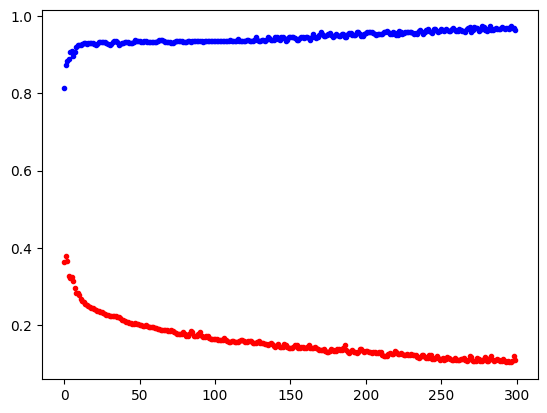

In [14]:
# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c = "red", markersize = 3)
plt.plot(x_len, y_acc, "o", c = "blue", markersize= 3)
plt.show()